<a href="https://colab.research.google.com/github/nguyendoanquangnhat/Fuzzy-Logic/blob/main/FuzzyLogic_EX4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#EX4: A fuzzy vacuum cleaner

In [2]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a95f1dcfcc709a4eebc49393abb062d56cb93845090ef1e6a3fe364178a1b04a
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


3.0


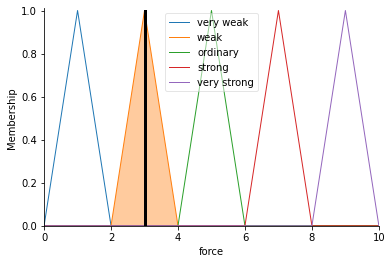

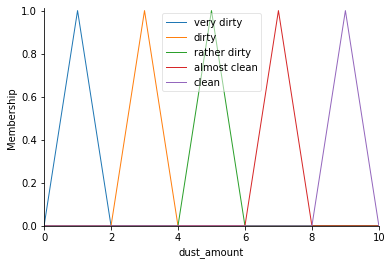

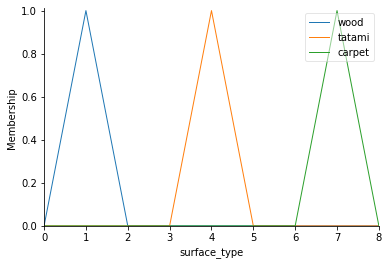

In [9]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

dust_amount = ctrl.Antecedent(np.arange(0,11,1),'dust_amount')
surface_type = ctrl.Antecedent(np.arange(0,9,1),'surface_type')
force = ctrl.Consequent(np.arange(0,11,1),'force')

dust_amount['very dirty'] = fuzz.trimf(dust_amount.universe,[0,1,2])
dust_amount['dirty'] = fuzz.trimf(dust_amount.universe,[2,3,4])
dust_amount['rather dirty'] = fuzz.trimf(dust_amount.universe,[4,5,6])
dust_amount['almost clean'] = fuzz.trimf(dust_amount.universe,[6,7,8])
dust_amount['clean'] = fuzz.trimf(dust_amount.universe,[8,9,10])

surface_type['wood'] = fuzz.trimf(surface_type.universe,[0,1,2])
surface_type['tatami'] = fuzz.trimf(surface_type.universe,[3,4,5])
surface_type['carpet'] = fuzz.trimf(surface_type.universe,[6,7,8])

force['very weak'] = fuzz.trimf(force.universe,[0,1,2])
force['weak'] = fuzz.trimf(force.universe,[2,3,4])
force['ordinary'] = fuzz.trimf(force.universe,[4,5,6])
force['strong'] = fuzz.trimf(force.universe,[6,7,8])
force['very strong'] = fuzz.trimf(force.universe,[8,9,10])

rule1 = ctrl.Rule(dust_amount['very dirty'] & surface_type['wood'], force['strong'])
rule2 = ctrl.Rule(dust_amount['dirty'] & surface_type['wood'], force['ordinary'])
rule3 = ctrl.Rule(dust_amount['rather dirty'] & surface_type['wood'], force['weak'])
rule4 = ctrl.Rule(dust_amount['almost clean'] & surface_type['wood'], force['very weak'])
rule5 = ctrl.Rule(dust_amount['clean'] & surface_type['wood'], force['very weak'])

rule6 = ctrl.Rule(dust_amount['very dirty'] & surface_type['tatami'], force['very strong'])
rule7 = ctrl.Rule(dust_amount['dirty'] & surface_type['tatami'], force['strong'])
rule8 = ctrl.Rule(dust_amount['rather dirty'] & surface_type['tatami'], force['ordinary'])
rule9 = ctrl.Rule(dust_amount['almost clean'] & surface_type['tatami'], force['weak'])
rule10 = ctrl.Rule(dust_amount['clean'] & surface_type['tatami'], force['very weak'])

rule11 = ctrl.Rule(dust_amount['very dirty'] & surface_type['carpet'], force['very strong'])
rule12 = ctrl.Rule(dust_amount['dirty'] & surface_type['carpet'], force['strong'])
rule13 = ctrl.Rule(dust_amount['rather dirty'] & surface_type['carpet'], force['ordinary'])
rule14 = ctrl.Rule(dust_amount['almost clean'] & surface_type['carpet'], force['ordinary'])
rule15 = ctrl.Rule(dust_amount['clean'] & surface_type['carpet'], force['weak'])

forcecontrol_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
forcecontrol = ctrl.ControlSystemSimulation(forcecontrol_ctrl)
forcecontrol.input['dust_amount'] = 7
forcecontrol.input['surface_type'] = 4
forcecontrol.compute()
print(forcecontrol.output['force'])
force.view(sim=forcecontrol)

dust_amount.view()
surface_type.view()